In [141]:

import pandas as pd
import sqlite3

# GET DF FROM DB

# Connect to .db file (or create it if it doesn't exist)
conn = sqlite3.connect("heart.db")

query = "SELECT * FROM heart_attack_risk"

# Load the query result into a DataFrame
df = pd.read_sql_query(query, conn)

conn.close()


In [142]:
df = pd.read_csv('heart_attack_prediction.csv')

In [143]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [117]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [118]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [119]:
df.drop(columns=['Patient ID','Country','Continent','Hemisphere','Income'], inplace=True)

In [120]:
#Reduce specificity to reduce number of unique values (skewing results)
#Blood Pressure 
df[['Systolic Pressure', 'Diastolic Pressure']]  = df['Blood Pressure'].str.split('/', expand=True)
df.drop(columns=['Blood Pressure'], inplace=True)  # Drop the original column
#Exercise Hours Per Week
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].astype('int')  
#Sedentary Hours Per Day
df['Sedentary Hours Per Day'] = df['Sedentary Hours Per Day'].astype('int')  
#BMI
df['BMI'] = df['BMI'].astype('int')



In [121]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,72,0,0,1,0,0,4,...,0,9,6,31,286,0,6,0,158,88
1,21,Male,389,98,1,1,1,1,1,1,...,0,1,4,27,235,1,7,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,...,1,9,9,28,587,4,4,0,174,99
3,84,Male,383,73,1,1,1,0,1,9,...,0,9,7,36,378,3,4,0,163,100
4,66,Male,318,93,1,1,1,1,0,5,...,0,6,1,21,231,1,5,0,91,88


In [122]:
df.nunique()

Age                                 73
Sex                                  2
Cholesterol                        281
Heart Rate                          71
Diabetes                             2
Family History                       2
Smoking                              2
Obesity                              2
Alcohol Consumption                  2
Exercise Hours Per Week             20
Diet                                 3
Previous Heart Problems              2
Medication Use                       2
Stress Level                        10
Sedentary Hours Per Day             12
BMI                                 22
Triglycerides                      771
Physical Activity Days Per Week      8
Sleep Hours Per Day                  7
Heart Attack Risk                    2
Systolic Pressure                   91
Diastolic Pressure                  51
dtype: int64

In [123]:
# Database
# Connect to SQLite (creates the database file if it doesn't exist)
conn = sqlite3.connect('heart.db')

# Save DataFrame to SQLite
df.to_sql('heart_attack_risk', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [124]:
# Review the DataFrame
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,72,0,0,1,0,0,4,...,0,9,6,31,286,0,6,0,158,88
1,21,Male,389,98,1,1,1,1,1,1,...,0,1,4,27,235,1,7,0,165,93
2,21,Female,324,72,1,0,0,0,0,2,...,1,9,9,28,587,4,4,0,174,99
3,84,Male,383,73,1,1,1,0,1,9,...,0,9,7,36,378,3,4,0,163,100
4,66,Male,318,93,1,1,1,1,0,5,...,0,6,1,21,231,1,5,0,91,88


In [125]:
# Convert categorical data to numeric 
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,1,208,72,0,0,1,0,0,4,...,0,9,6,31,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1,...,0,1,4,27,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2,...,1,9,9,28,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9,...,0,9,7,36,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5,...,0,6,1,21,231,1,5,0,91,88


In [126]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Diet' column to numeric values
df['Diet'] = label_encoder.fit_transform(df['Diet'])

# Print the mapping of categories to numbers
for i, category in enumerate(label_encoder.classes_):
    print(f"{category} is mapped to {i}")

Average is mapped to 0
Healthy is mapped to 1
Unhealthy is mapped to 2


In [127]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["Heart Attack Risk"]

# Separate the X variable, the features
X = df.copy()
X.drop("Heart Attack Risk", axis = 1, inplace=True)

In [128]:
# Review the y variable Series
y.value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [129]:
# Review the X variable DataFrame
X.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic Pressure,Diastolic Pressure
0,67,1,208,72,0,0,1,0,0,4,...,0,0,9,6,31,286,0,6,158,88
1,21,1,389,98,1,1,1,1,1,1,...,1,0,1,4,27,235,1,7,165,93
2,21,0,324,72,1,0,0,0,0,2,...,1,1,9,9,28,587,4,4,174,99
3,84,1,383,73,1,1,1,0,1,9,...,1,0,9,7,36,378,3,4,163,100
4,66,1,318,93,1,1,1,1,0,5,...,1,0,6,1,21,231,1,5,91,88


In [130]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1,stratify=y)

In [131]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [133]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=1, solver='liblinear', C=1.0, class_weight='balanced')

# Fit the model to the resampled training data
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=1, solver='liblinear')

In [134]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability scores for ROC curve


In [135]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.56      1406
           1       0.36      0.51      0.42       785

    accuracy                           0.50      2191
   macro avg       0.50      0.50      0.49      2191
weighted avg       0.54      0.50      0.51      2191



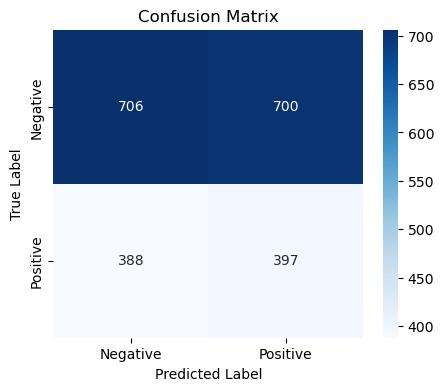

In [136]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [137]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE-balanced data
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy after SMOTE: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy after SMOTE: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.61      0.63      1406
           1       0.35      0.38      0.37       785

    accuracy                           0.53      2191
   macro avg       0.50      0.50      0.50      2191
weighted avg       0.54      0.53      0.53      2191



In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=1)

# Initialize RFE with the logistic regression model
rfe = RFE(log_reg, n_features_to_select=10)  # Adjust n_features_to_select based on dataset size

# Fit RFE on training data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Transform dataset to keep only selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train logistic regression with selected features
log_reg.fit(X_train_selected, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_selected)

# Evaluate model accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy:.2f}")
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Selected Features: Index(['Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day'],
      dtype='object')
Accuracy after feature selection: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1406
           1       0.00      0.00      0.00       785

    accuracy                           0.64      2191
   macro avg       0.32      0.50      0.39      2191
weighted avg       0.41      0.64      0.50      2191



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
